In [12]:
%matplotlib inline

import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

In [24]:
#Helper Functions
def get_lables():
    lables = {}
    for x in df['location_raw']:
        if not x in lables:
            lables[x] = 1
        else:
            lables[x] = lables[x] + 1
            
def time_to_datetime(strs):
    date_str = strs[0]
    time_str = strs[1]
    full_str = date_str + '-' + time_str #e.g.: 10/1/13-0:43
    return datetime.datetime.strptime(full_str, '%m/%d/%y-%H:%M')

def time_of_day(dt):
    """
    Return the decimal number of hours since 12am represented by the datetime obj
    """
    return dt.hour + dt.minute/60 + dt.second/3600

In [3]:
df = pd.read_csv('CT_cleaned.csv')
df

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,...,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,officer_id,stop_duration
0,CT-2013-00001,CT,10/1/13,0:01,westport,Fairfield County,9001.0,"00000 N I 95 (WESTPORT, T158) X 18 LL",State Police,F,...,Speed Related,Speeding,False,NaN,NaN,False,Ticket,False,1000002754,1-15 min
1,CT-2013-00002,CT,10/1/13,0:02,mansfield,Tolland County,9013.0,rte 195 storrs,State Police,M,...,Moving Violation,Moving violation,False,NaN,NaN,False,Verbal Warning,False,1000001903,1-15 min
2,CT-2013-00003,CT,10/1/13,0:07,franklin,New London County,9011.0,Rt 32/whippoorwill,State Police,M,...,Speed Related,Speeding,False,NaN,NaN,False,Ticket,False,1000002711,1-15 min
3,CT-2013-00004,CT,10/1/13,0:10,danbury,Fairfield County,9001.0,I-84,State Police,M,...,Speed Related,Speeding,False,NaN,NaN,False,Written Warning,False,113658284,1-15 min
4,CT-2013-00005,CT,10/1/13,0:10,east hartford,Hartford County,9003.0,"00000 W I 84 (EAST HARTFORD, T043)E.OF XT.56",State Police,M,...,Speed Related,Speeding,False,NaN,NaN,False,Ticket,False,830814942,1-15 min
5,CT-2013-00006,CT,10/1/13,0:10,trumbull,Fairfield County,9001.0,rt 8,State Police,M,...,Defective Lights,Lights,False,NaN,NaN,False,Verbal Warning,False,230931989,1-15 min
6,CT-2013-00007,CT,10/1/13,0:11,harwinton,Litchfield County,9005.0,rt4 rt 72,State Police,M,...,Other,Other,False,NaN,NaN,False,Ticket,False,1000002241,1-15 min
7,CT-2013-00008,CT,10/1/13,0:13,westport,Fairfield County,9001.0,95 x 18sb,State Police,M,...,Speed Related,Speeding,False,NaN,NaN,False,Verbal Warning,False,1000002754,1-15 min
8,CT-2013-00009,CT,10/1/13,0:15,manchester,Hartford County,9003.0,"00000 S WILBUR CROSS HWY (MANCHESTER, T077)",State Police,M,...,Speed Related,Speeding,False,NaN,NaN,False,Ticket,False,1000001920,1-15 min
9,CT-2013-00010,CT,10/1/13,0:16,beacon falls,New Haven County,9009.0,rt 8 exit 25,State Police,M,...,Moving Violation,Moving violation,False,NaN,NaN,False,Verbal Warning,False,1000003026,1-15 min


In [4]:
#munging
df = df.replace('', np.nan)
df['violation'] = df['violation'].str.split(',') #make violations into list
violations = df['violation'].apply(pd.Series).stack().reset_index(drop=True) #create a Series of all violatioins, takes a long time

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

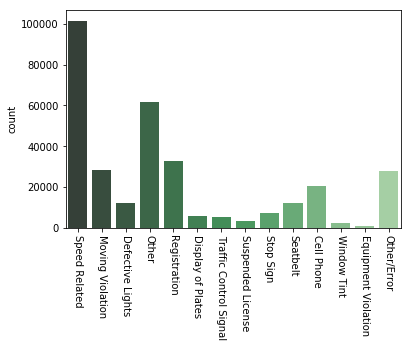

In [5]:
violations_plot = sns.countplot(x=violations, palette="Greens_d")
plt.xticks(rotation=270)

ValueError: cannot convert float NaN to integer

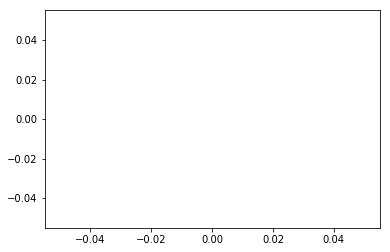

In [26]:
df['stop_datetime'] = df[['stop_date', 'stop_time']].dropna(axis=0).apply(time_to_datetime, axis=1)
df['stop_time_of_day'] = df['stop_datetime'].apply(time_of_day)
sns.distplot(df['stop_time_of_day'])